## Multi Layer Perceptrons (MLP)

In [52]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor # MLP Regressor
from sklearn.pipeline import make_pipeline # Pipeline
from sklearn.preprocessing import StandardScaler # StandardScaler

In [5]:
housing = fetch_california_housing()

In [9]:
import pandas as pd
housing_df = pd.DataFrame(housing['data'])

In [14]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                               housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                               y_train_full, random_state=42)

In [21]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [20]:
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred)**(1/2)
rmse

0.5053326657968684

## Keras and TensorFlow

In [1]:
import tensorflow as tf

2025-01-11 17:30:18.469666: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-11 17:30:18.470541: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-11 17:30:18.475105: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-11 17:30:18.487621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736627418.509749    9086 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736627418.51

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [5]:
X_train, X_valid, X_test = X_train / 255,X_valid / 255, X_test / 255

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[7]]

'Pullover'

In [24]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>]

In [27]:
model.layers[0].name

'flatten_1'

In [28]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd",
              metrics=["accuracy"])

In [33]:
history = model.fit(X_train, y_train, epochs=30,
          validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9221 - loss: 0.2201 - val_accuracy: 0.8766 - val_loss: 0.3481
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9235 - loss: 0.2163 - val_accuracy: 0.8760 - val_loss: 0.3486
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9247 - loss: 0.2125 - val_accuracy: 0.8782 - val_loss: 0.3510
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9265 - loss: 0.2089 - val_accuracy: 0.8772 - val_loss: 0.3498
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9273 - loss: 0.2053 - val_accuracy: 0.8768 - val_loss: 0.3542
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9287 - loss: 0.2018 - val_accuracy: 0.8770 - val_loss: 0.3541
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9297 - loss: 0.1984 - val_accuracy: 0.8770 - val_loss: 0.3565
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9312 -

<Axes: xlabel='Epoch'>

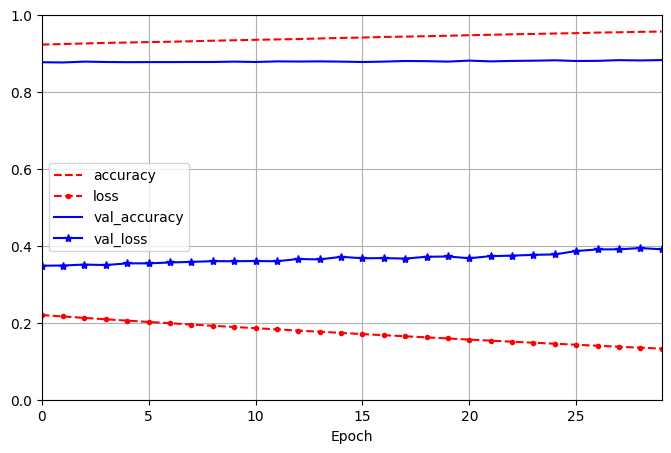

In [41]:
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])

In [42]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8828 - loss: 0.3902


[0.3849110007286072, 0.8823999762535095]

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [46]:
y_pred = y_proba.argmax(axis=-1)
[y_pred == y_test[:3]]

[array([ True,  True,  True])]

### Sequential API on Regression

In [53]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                               housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                               y_train_full, random_state=42)

In [54]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer = optimizer,
              metrics =["RootMeanSquaredError"])
norm_layer.adapt(X_train)

/home/salgado/scripts/hands_on_ml/.venv/lib64/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - RootMeanSquaredError: 1.2696 - loss: 1.7438 - val_RootMeanSquaredError: 0.6040 - val_loss: 0.3648
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - RootMeanSquaredError: 0.6269 - loss: 0.3934 - val_RootMeanSquaredError: 0.5803 - val_loss: 0.3368
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - RootMeanSquaredError: 0.6032 - loss: 0.3641 - val_RootMeanSquaredError: 0.9245 - val_loss: 0.8548
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - RootMeanSquaredError: 0.5921 - loss: 0.3507 - val_RootMeanSquaredError: 0.9861 - val_loss: 0.9723
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - RootMeanSquaredError: 0.5816 - loss: 0.3384 - val_RootMeanSquaredError: 1.1202 - val_loss: 1.2549
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - RootMeanSquaredError: 0.5763 - loss: 0.3323 - val_RootMeanSquaredError: 1.0350 - val_loss: 1.0713
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - RootMeanSquaredError: 0.5666 - lo

In [56]:
y_pred

array([[0.5475869],
       [1.1062672],
       [4.92231  ]], dtype=float32)

## Different Topologies

In [57]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [59]:
input_= tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

In [60]:
model = tf.keras.Model(inputs=[input_], outputs=[output])

In [63]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer = optimizer,
              metrics =["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [64]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


/home/salgado/scripts/hands_on_ml/.venv/lib64/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_48']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - RootMeanSquaredError: 280.3311 - loss: 100102.1875 - val_RootMeanSquaredError: 3.8647 - val_loss: 14.9363
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - RootMeanSquaredError: 2.9581 - loss: 8.7610 - val_RootMeanSquaredError: 3.1366 - val_loss: 9.8384
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - RootMeanSquaredError: 2.2247 - loss: 4.9604 - val_RootMeanSquaredError: 2.5522 - val_loss: 6.5135
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - RootMeanSquaredError: 1.6986 - loss: 2.8870 - val_RootMeanSquaredError: 2.2132 - val_loss: 4.8982
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - RootMeanSquaredError: 1.4635 - loss: 2.1422 - val_RootMeanSquaredError: 2.0078 - val_loss: 4.0311
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - RootMeanSquaredError: 1.3384 - loss: 1.7916 - val_RootMeanSquaredError: 1.8487 - val_loss: 3.4176
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - RootMeanSquaredError: 1.2523 - los

/home/salgado/scripts/hands_on_ml/.venv/lib64/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_48']
Received: inputs=Tensor(shape=(3, 8))
  warnings.warn(msg)


In [72]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [75]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [77]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [68]:
X_train

array([[   3.5214    ,   15.        ,    3.04994451, ...,    1.60599334,
          37.63      , -122.43      ],
       [   5.3275    ,    5.        ,    6.49005964, ...,    3.44333996,
          33.69      , -117.39      ],
       [   3.1       ,   29.        ,    7.54237288, ...,    2.25084746,
          38.44      , -122.98      ],
       ...,
       [   1.5561    ,   35.        ,    4.13993174, ...,    3.27645051,
          34.11      , -117.29      ],
       [   2.1055    ,   52.        ,    5.17849462, ...,    2.92688172,
          36.76      , -119.79      ],
       [   5.6022    ,   31.        ,    6.21971253, ...,    2.53798768,
          38.04      , -122.2       ]])

In [79]:
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), 
                                     y_valid))

mse_test, rmse_test = model.evaluate((X_test_wide, X_test_deep), y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - RootMeanSquaredError: 2.0858 - loss: 4.6246 - val_RootMeanSquaredError: 10.1271 - val_loss: 102.5578
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - RootMeanSquaredError: 8.6006 - loss: 81.8589 - val_RootMeanSquaredError: 3.0360 - val_loss: 9.2173
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 1.3159 - loss: 1.7447 - val_RootMeanSquaredError: 2.7178 - val_loss: 7.3867
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - RootMeanSquaredError: 1.1235 - loss: 1.2757 - val_RootMeanSquaredError: 3.9651 - val_loss: 15.7217
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 2.0519 - loss: 4.4753 - val_RootMeanSquaredError: 2.7282 - val_loss: 7.4429
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 1.0186 - loss: 1.0455 - val_RootMeanSquaredError: 4.7159 - val_loss: 22.2398
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 5.0059

In [80]:
y_pred = model.predict((X_new_wide, X_new_deep))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[-0.32302627],
       [-0.37711012],
       [ 0.11754126]], dtype=float32)

In [81]:
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_7     │ (None, 6)         │         13 │ input_layer_11[0… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_10      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 30)        │        210 │ normalization_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_6     │ (None, 5)         │         11 │ input_layer_10[0… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 30)        │        930 │ dense_27[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 35)        │          0 │ normalization_6[… │
│ (Concatenate)       │                   │            │ dense_28[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 1)         │         36 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,554 (13.89 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

 Optimizer params: 2,354 (9.20 KB)